In [3]:
import pandas as pd
import numpy as np

In [4]:
historical_data = pd.read_csv('investigate_window.csv')

In [5]:
historical_data.head()

,Unnamed: 0,user_id,main_page_viewed_at,order_completed_at,time_to_order
0,0,959238,2020-11-20 23:55:02.759000+00:00,2020-11-30 02:22:32.759000+00:00,9.102431
1,1,337366,2020-12-05 23:41:42.244000+00:00,2020-12-12 22:25:52.244000+00:00,6.947338
2,2,259956,2020-11-20 23:33:53.269000+00:00,2020-11-25 13:08:03.269000+00:00,4.565394
3,3,534280,2020-11-28 23:44:56.556000+00:00,2020-12-05 10:14:06.556000+00:00,6.436921
4,4,795121,2020-11-18 23:59:56.236000+00:00,2020-11-27 02:38:16.236000+00:00,8.109954


In [6]:
# Проверь, выводятся ли даты в формате datetime. Если нет — исправь это. 

historical_data = pd.read_csv('investigate_window.csv', parse_dates = [2,3], index_col = 0)
historical_data.dtypes

user_id                              int64
main_page_viewed_at    datetime64[ns, UTC]
order_completed_at     datetime64[ns, UTC]
time_to_order                      float64
dtype: object

In [7]:
import numpy as np

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [9]:
perc_95 = np.percentile(historical_data['time_to_order'], 95) 
perc_95

7.117476851851854

In [10]:
perc_90 = np.percentile(historical_data['time_to_order'], 90)
perc_90

2.864949845679016

In [11]:
perc_85 = np.percentile(historical_data['time_to_order'], 85)
perc_85

1.9903886959876524

In [12]:
perc_85 = round(np.percentile(historical_data['time_to_order'], 85), 1)

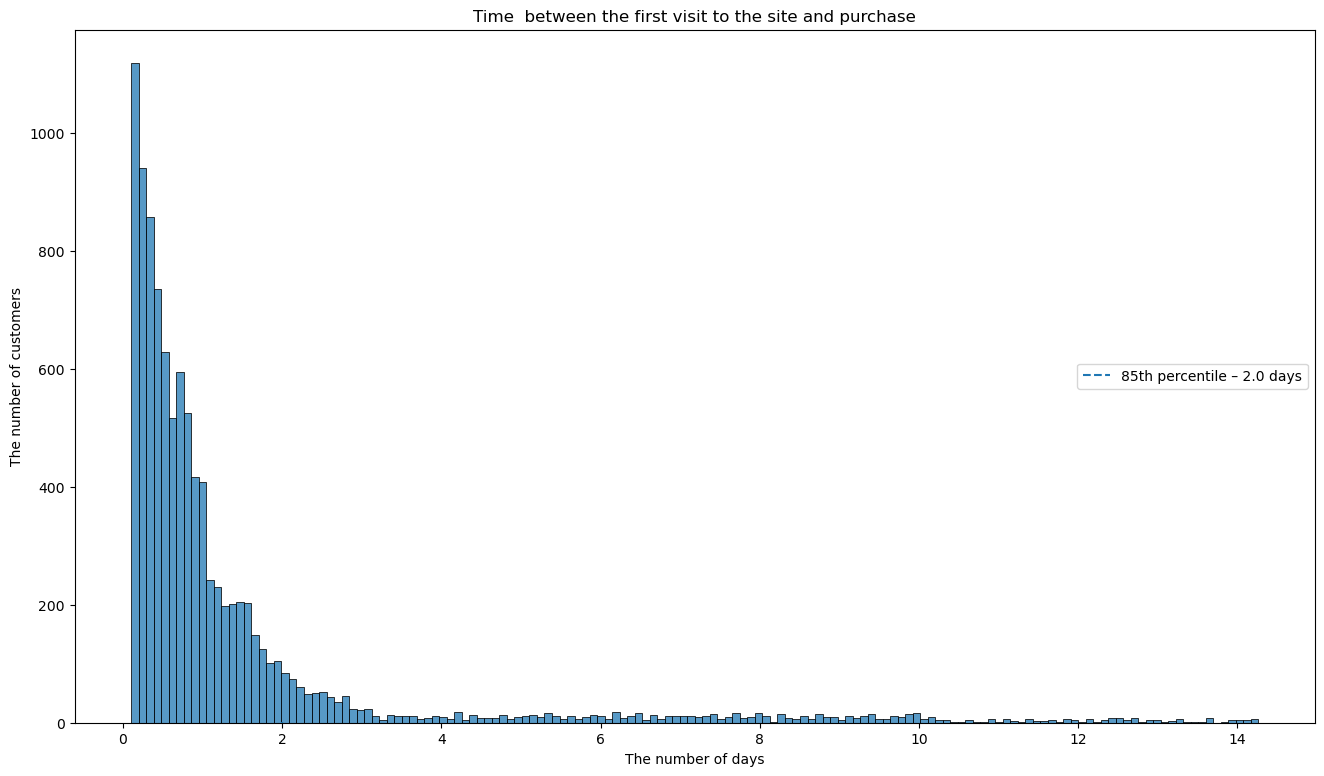

In [14]:
plt.figure(figsize=(16,9))
sns.histplot(historical_data['time_to_order'])
plt.vlines(perc_85, ymin = 0, ymax = 0.7, linestyles = 'dashed', label = f'85th percentile – {perc_85} days')
plt.title('Time  between the first visit to the site and purchase')
plt.xlabel('The number of days')
plt.ylabel('The number of customers')
plt.legend(loc='center right')
plt.show()

## Задание 2. Исследуй распределение пользователей по группам по основным сегментам 

**1. Прочитай файл bakery_ab_test.csv.**
   - Проверь, импортированы ли нужные тебе библиотеки.
   - Запиши данные в переменную `data`. 
   - Назначь индекс аналогично первому заданию.

In [16]:
import pandas as pd
import numpy as np

bakery_data = pd.read_csv('bakery_ab_test.csv', index_col=0)
bakery_data

,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
1,3738,test,306.639511,regions,target_direct,1,pc
2,3755,control,NaN,regions,target_direct,0,pc
3,3772,test,NaN,regions,context_brand,0,mobile
4,3789,control,NaN,spb,target_direct,0,pc
5,3806,test,NaN,regions,social_media,0,pc
...,...,...,...,...,...,...,...
152995,2604636,test,NaN,regions,target_direct,0,pc
152996,2604653,control,5236.818309,regions,organic,1,mobile
152997,2604670,control,NaN,regions,target_direct,0,pc
152998,2604687,control,101.783032,regions,target_direct,1,pc


In [17]:
group_cnt = bakery_data['test_group'].value_counts()
channel_cnt = bakery_data['acquisition_channel'].value_counts()

print(group_cnt)
print(channel_cnt)

test       75273
control    75210
Name: test_group, dtype: int64
target_direct    71365
organic          45394
social_media     19385
context_brand    14339
Name: acquisition_channel, dtype: int64


**2. Напиши функцию plot_segment_distribution, чтобы проверить распределение пользователей по сегментам внутри каждой группы.**
   - Аргументами функции должны быть данные теста, колонки с сегментами (маркетинг, гео и платформа), тест-фактор.
   - Для каждого сегмента в функции агрегируй данные, посчитав по для каждой группы и сегмента количество пользователей.
   - Сбрость индекс.
   - Добавь в функцию построение столбиковой диаграммы (bar chart).

In [18]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_segment_distribution(bakery_data, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = bakery_data.groupby(by = [test_factor, segment])['user_id'].count().reset_index()
        sns.catplot(x = segment, 
                    y = 'user_id', 
                    hue = test_factor, 
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 4,  
                    aspect = 1.5) 
    



**3. Вызови функцию и посмотри на графики. Какой вывод о качестве сплитования ты можешь сделать?**
    — Передай списком столбцы, в которых обозначены сегменты пользователей, и отдельно столбец с тест-фактором.

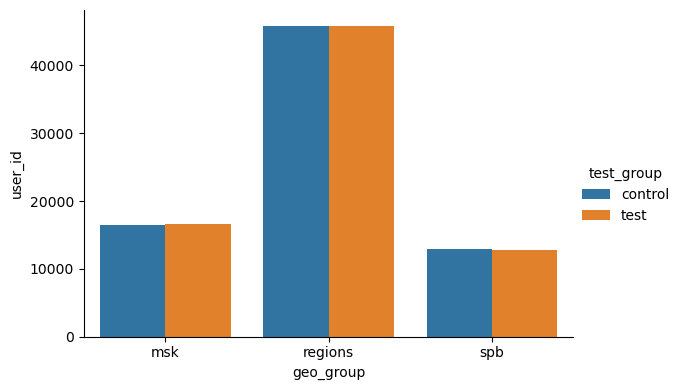

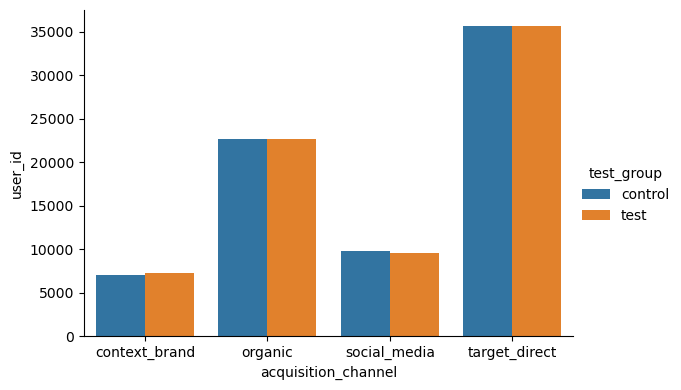

In [19]:
plot_segment_distribution(bakery_data, 
                           ['geo_group', 'acquisition_channel'], 
                           'test_group') 

## Задание 3. Используй критерий Хи-квадрат для конверсии


В прошлом задании ты, скорее всего, столкнулся с неравномерным распределением пользователей. Раньше мы просто перезапускали тест, чтобы собрать данные, но сейчас тест уже завершен, так что нам нужно анализировать те данные, которые есть. Мы не можем исправить данные, но можем проанализировать общие результаты и сравнить их с результатами для пользователей, зашедших с разных платформ, чтобы уменьшить риск принятия ошибочного решения. Поэтому дальше мы будем анализировать параллельно 3 теста:

1. Все пользователи, попавшие в тест
2. Пользователи, заходившие с ПК `platform = 'pc'`
3. Пользователи, заходившие с мобильного `platform = 'mobile'`

**Создай для каждой из 3 групп теста отдельную таблицу с метриками**
   - общее количество пользователей 
   - количество покупок в окне конверсии
   - средняя сумма покупки 
   - конверсия (количество покупок в окне конверсии / общее количество пользователей или среднее по полю `within_window`)
    
*Для фильтрации нужных пользователей можешь использовать* `loc[ ]`


In [20]:
# The total numbers of customers
users_cnt = bakery_data.groupby('test_group').size().reset_index(name='users_cnt')

# Number of purchases in the conversion window 
conver_cnt = bakery_data.loc[bakery_data['within_window']==1].groupby('test_group')['user_id'].nunique().reset_index(name='conver_cnt')

# Average amount of purchase
mean_purchase_value = bakery_data.groupby('test_group')['purchase_amount'].mean().reset_index(name='mean_purchase_value')

# Conversion 
metrics = bakery_data.groupby('test_group')['within_window'].mean().reset_index(name='conversion')
metrics = bakery_data.groupby('test_group', as_index= 0).agg({'user_id': 'count', 'within_window': 'sum'})
metrics['conversion'] = round(metrics['within_window']/metrics['user_id']*100, 2)
metrics

,test_group,user_id,within_window,conversion
0,control,75210,22998,30.58
1,test,75273,24427,32.45


In [21]:
pc_users = bakery_data.loc[bakery_data['platform'] == 'pc']

# The total numbers of customers from platform = 'pc'
users_cnt_pc = pc_users.groupby('test_group').size().reset_index(name='users_cnt')

# Number of purchases in the conversion window users of the 'pc' platform
conver_cnt_pc = pc_users.loc[pc_users['within_window'] == 1].groupby('test_group')['user_id'].nunique().reset_index(name='conver_cnt')

# Average amount of purchase users of the 'pc' platform
mean_purchase_value_pc = pc_users.groupby('test_group')['purchase_amount'].mean().reset_index(name='mean_purchase_value')

# Conversion from 'pc' platform
metrics_pc = pc_users.groupby('test_group')['within_window'].mean().reset_index(name='conversion')
metrics_pc = pc_users.groupby('test_group', as_index=0).agg({'user_id': 'count', 'within_window': 'sum'})
metrics_pc['conversion'] = round(metrics_pc['within_window'] / metrics_pc['user_id'] * 100, 2)
metrics_pc

,test_group,user_id,within_window,conversion
0,control,45112,13732,30.44
1,test,60317,19659,32.59


In [22]:
mobile_users = bakery_data.loc[bakery_data['platform'] == 'mobile']

# The total numbers of customers from platform = 'mobile'
users_cnt_mobile = mobile_users.groupby('test_group').size().reset_index(name='users_cnt')

# Number of purchases in the conversion window users of the 'mobile' platform
conver_cnt_mobile = mobile_users.loc[mobile_users['within_window'] == 1].groupby('test_group')['user_id'].nunique().reset_index(name='conver_cnt')

# Average amount of purchase users of the 'mobile' platform
mean_purchase_value_mobile = mobile_users.groupby('test_group')['purchase_amount'].mean().reset_index(name='mean_purchase_value')

# Conversion from 'mobile' platform
metrics_mobile = mobile_users.groupby('test_group')['within_window'].mean().reset_index(name='conversion')
metrics_mobile = mobile_users.groupby('test_group', as_index=0).agg({'user_id': 'count', 'within_window': 'sum'})
metrics_mobile['conversion'] = round(metrics_mobile['within_window'] / metrics_mobile['user_id'] * 100, 2)
metrics_mobile

,test_group,user_id,within_window,conversion
0,control,30098,9266,30.79
1,test,14956,4768,31.88


**1. Вычисли** `p-value` **для каждой группы с помощью теста хи-квадрат**

   - Импортируй библиотеку `statsmodels` и используй функцию `proportions_chisquare` из нее
   - Результат работы функции `proportions_chisquare` присвой трем переменным для каждой группы


In [23]:
import statsmodels.stats.proportion as proportion

In [24]:
chi2stat, pval, table = proportion.proportions_chisquare(metrics['conversion'], metrics['user_id'])

In [25]:
print('hi2stat = ',chi2stat)
print('pval = ',pval)
print('table = ',table)

hi2stat =  0.05394782473474283
pval =  0.8163308667537793
table =  (array([[3.058000e+01, 7.517942e+04],
       [3.245000e+01, 7.524055e+04]]), array([[3.15018062e+01, 7.51784982e+04],
       [3.15281938e+01, 7.52414718e+04]]))


In [26]:
chi2stat_pc, pval_pc, table_pc = proportion.proportions_chisquare(metrics_pc['conversion'], metrics_pc['user_id'])
print('chi2stat_pc = ',chi2stat_pc)
print('pval_pc =',pval_pc)
print('table_pc = ',table_pc)

chi2stat_pc =  0.780881781090049
pval_pc = 0.3768715954060702
table_pc =  (array([[3.044000e+01, 4.508156e+04],
       [3.259000e+01, 6.028441e+04]]), array([[2.69698978e+01, 4.50850301e+04],
       [3.60601022e+01, 6.02809399e+04]]))


In [27]:
chi2stat_mobile, pval_mobile, table_mobile = proportion.proportions_chisquare(metrics_mobile['conversion'], metrics_mobile['user_id'])
print('chi2stat_mobile = ',chi2stat_mobile)
print('pval_mobile =',pval_mobile)
print('table_mobile = ',table_mobile)

chi2stat_mobile =  8.839817579905878
pval_mobile = 0.0029472860301175247
table_mobile =  (array([[   30.79, 30067.21],
       [   31.88, 14924.12]]), array([[4.18662418e+01, 3.00561338e+04],
       [2.08037582e+01, 1.49351962e+04]]))


**2. Введи в анализ уровень значимости в 5% с помощью переменной** `alpha`.


In [28]:
alpha = 0.05

In [29]:
if pval < alpha: 
    print('The result of the experiment can be considered statistically significant')
elif pval > alpha: 
    print('No statistically significant difference in conversion was found as the p-value is above the selected threshold of first-order error')

No statistically significant difference in conversion was found as the p-value is above the selected threshold of first-order error


In [31]:
print('CONCLUSION: Since NO statistical significance was found between the conversions and the p-value exceeds the chosen threshold of first-order error, it is not possible to reject the null hypothesis that there is no statistically significant difference between the groups. In this case, the null hypothesis of equality of mean conversions is accepted.')

CONCLUSION: Since NO statistical significance was found between the conversions and the p-value exceeds the chosen threshold of first-order error, it is not possible to reject the null hypothesis that there is no statistically significant difference between the groups. In this case, the null hypothesis of equality of mean conversions is accepted.


## Задание 4. Вычисли мощность теста

1. Импортируй объект `stats.power` из библиотеки `statsmodels`
2. Присвой функцию `GofChisquarePower()` из этой библиотеки в переменную `chipower` 
3. Реализуй функцию для подсчета `effect_size`

In [37]:
import statsmodels.stats.power as smp


In [38]:
chipower = smp.GofChisquarePower()


`effect_size` — это та самая наблюдаемая разница между двумя вариантами. Вычисляется следующим образом: 

$$ES = \sqrt{(p_0 - p_1)^2/p_o}$$

, где под $p_0$ можно понимать конверсию в контрольной группе, а $p_1$ — тестовой

In [39]:
def chi2_effect_size(p0, p1):
    return np.sqrt(((p0 - p1)**2 / p0))

4. Запиши значения конверсии в тестовой `conversion_test` и контрольной `conversion_control` группы в разные переменные
    - переведи серию в массив с помощью `.values[ ]`
    - раздели значения на 100, чтобы получить значения, а не %
    
    
5. Создай переменную nobs для количества наблюдений и запиши в нее значение меньшей группы

In [40]:
# conversion in the control group
conversion_control = metrics['conversion'].values[0]/100 

# conversion in the test group 
conversion_test = metrics['conversion'].values[1]/100

nobs = min(metrics['user_id'])

In [41]:
conversion_control_mobile = metrics_mobile['conversion'].values[0]/100
conversion_test_mobile = metrics_mobile['conversion'].values[1]/100
nobs_mobile =  min(metrics_mobile['user_id'])

In [42]:
conversion_control_pc = metrics_pc['conversion'].values[0]/100
conversion_test_pc = metrics_pc['conversion'].values[1]/100
nobs_pc = min(metrics_pc['user_id'])

**6. Вызови функцию .solve_power и передай ей в аргументы** 
    - effect_size
    - количество наблюдений меньшей группы
    - значение p-value
    - мощности присвой значение None
    
**7. Сделай анализ мощности для каждого сегмента, для которого делали тест хи-квадрат.**

Оставь комментарий, как ты оцениваешь мощность этого теста? Можно ли на основе таких показателей делать выводы?


In [43]:
power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control, conversion_test), 
                                                           nobs = nobs,
                                                           alpha = pval, 
                                                           power = None) 
power

1.0

In [44]:
mobile_power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control_mobile, conversion_test_mobile), 
                                                           nobs = nobs_mobile,
                                                           alpha = pval_mobile, 
                                                           power = None)
mobile_power

0.2840435046099488

In [48]:
pc_power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control_pc, conversion_test_pc), 
                                                           nobs = nobs_pc,
                                                           alpha = pval_pc, 
                                                           power = None)
pc_power

0.9999999999999282

In [49]:
print('For the "mobile" segment, the power is 0.284, meaning that the test is not very sensitive to detect real differences between the test and control groups in this segment. For the "PC" segment and total users, power values close to 1 are obtained, indicating that the test is sufficiently sensitive in these segments. However, due to the low power for one of the segments, it is not possible to draw a reliable conclusion based on this test as a whole.')

For the "mobile" segment, the power is 0.284, meaning that the test is not very sensitive to detect real differences between the test and control groups in this segment. For the "PC" segment and total users, power values close to 1 are obtained, indicating that the test is sufficiently sensitive in these segments. However, due to the low power for one of the segments, it is not possible to draw a reliable conclusion based on this test as a whole.


## Задание 5. Воспользуйся бутстрапом для оценки влияния теста на средний чек

**1. Сделай бутстрап среднего чека для тестовой и контрольной выборок, визуализируй результат. Какие выводы можно сделать?**
   - загрузи нужные модули из библиотеки `bootstrapped`
   - для сегментов, которые мы анализируем отдельно, создай переменную со значением среднего чека
   - чтобы убрать строки без покупок, используй `dropna()` и `.values`, чтобы перевести данные в формат массива

In [54]:
import bootstrapped

In [55]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
import numpy as np

In [53]:
test = bakery_data[(bakery_data['test_group'] == 'test')]['purchase_amount'].dropna().values
control = bakery_data[(bakery_data['test_group'] == 'control')]['purchase_amount'].dropna().values

test_pc = bakery_data[(bakery_data['test_group'] == 'test') & (bakery_data['platform'] == 'pc')]['purchase_amount'].dropna().values
control_pc = bakery_data[(bakery_data['test_group'] == 'control') & (bakery_data['platform'] == 'pc')]['purchase_amount'].dropna().values

test_mobile = bakery_data[(bakery_data['test_group'] == 'test') & (bakery_data['platform'] == 'mobile')]['purchase_amount'].dropna().values
control_mobile = bakery_data[(bakery_data['test_group'] == 'control') & (bakery_data['platform'] == 'mobile')]['purchase_amount'].dropna().values

**2. Вызови функцию `bootstrap_ab` для каждого сегмента, передай ей нужные аргументы**
   - `test = `
   - `ctrl = `
   - `stat_func = bs_stats.mean`
   - `compare_func = bs_compare.difference`
   - `return_distribution = True`

In [56]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

In [57]:
boot = bs.bootstrap_ab(test = test, ctrl = control
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

In [58]:
boot_pc = bs.bootstrap_ab(test = test_pc, ctrl = control_pc
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

In [59]:
boot_mobile = bs.bootstrap_ab(test = test_mobile, ctrl = control_mobile
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

**3. Задай размер доверительного интервала для каждого исследуемого сегмента 95% с помощью перцентилей**

In [60]:
borders = np.percentile(boot, [2.5, 97.5]) 

borders_pc = np.percentile(boot_pc, [2.5, 97.5])  

borders_mobile = np.percentile(boot_mobile, [2.5, 97.5])


**4. Оцени, есть ли статистически значимое изменение по среднему чеку в каждом сегменте**

   - Построй гистограмму распределения значений среднего чека.
   - Выведи границы доверительного интервала линиями.
   - Выведи ноль красной линией.
   - Оставь комментарий, есть ли статистически значимое изменение по среднему чеку в каждом сегменте.
   

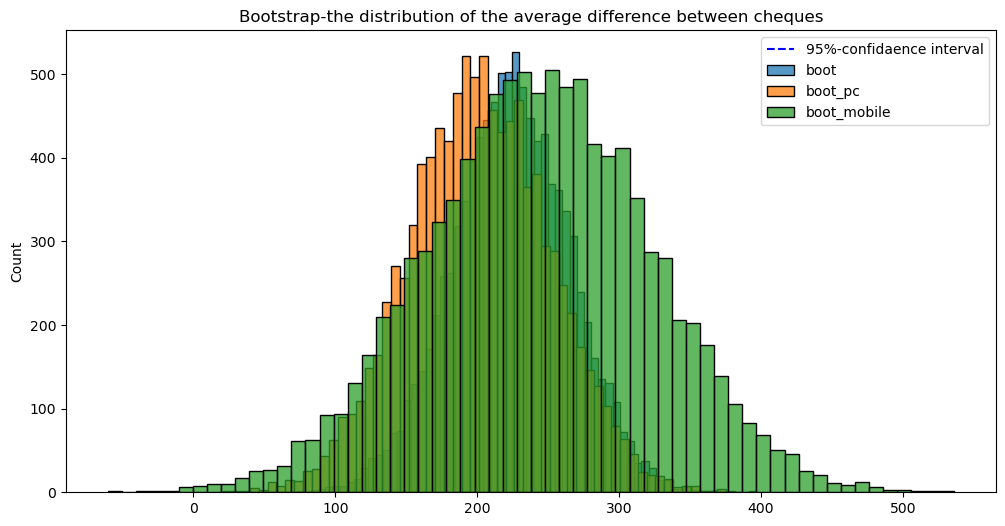

In [66]:

sns.histplot(boot, label='boot')
sns.histplot(boot_pc, label='boot_pc')
sns.histplot(boot_mobile, label='boot_mobile')

plt.title('Bootstrap-the distribution of the average difference between cheques')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0,  
           ymin=0,
           ymax=0.003,
           linestyles='--',
           colors='red')
plt.vlines(borders,  
           ymin=0,
           ymax=0.003,
           linestyles='--',
           colors='blue',
           label='95%-confidaence interval')
plt.legend()
plt.show()


## Задание 6. Сделай вывод по результатам проведенного теста (заданий 2–5)

Нужно ли внедрять изменение каталога? Почему?

# 🎉🎉🎉 Поздравляем, ты великолепен! 

In [63]:
print('CONCLUSION:  According to the results of the A/B test run to compare the change in the average cheque of the two groups in each segment, a statistically significant result was found. Namely, the confidence interval for the difference in mean values does not contain zero, which indicates that the groups do differ in terms of average check. This means that the differences found between the groups cannot be explained by mere random factors and represent real differences in consumer behaviour or the effectiveness of the strategies employed in each group. Thus, it is safe to say that the A/B test conducted has produced important and valid results that confirm the statistical significance of the differences between the groups..')

CONCLUSION:  According to the results of the A/B test run to compare the change in the average cheque of the two groups in each segment, a statistically significant result was found. Namely, the confidence interval for the difference in mean values does not contain zero, which indicates that the groups do differ in terms of average check. This means that the differences found between the groups cannot be explained by mere random factors and represent real differences in consumer behaviour or the effectiveness of the strategies employed in each group. Thus, it is safe to say that the A/B test conducted has produced important and valid results that confirm the statistical significance of the differences between the groups..
